In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
from collections import Counter


exec(open('utils.py').read())
print('Loaded')


def pct_dist(a=None, b=None, mean=None, sd=None):
    if a is not None:
        return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 
    else:
        return sq.lognorm(lognorm_mean=mean, lognorm_sd=sd, lclip=0.001, rclip=1, credibility=80) 


def lab_spend_on_largest_model_this_year(total_investment,
                                         total_revenue,
                                         percent_investment_spent_this_year,
                                         percent_revenue_that_is_profit,
                                         percent_profit_spent_this_year,
                                         percent_spend_on_compute,
                                         percent_compute_on_biggest_model):
    money = total_investment * percent_investment_spent_this_year
    money += total_revenue * percent_revenue_that_is_profit * percent_profit_spent_this_year
    return sq.dist_fn(money * percent_spend_on_compute * percent_compute_on_biggest_model, fn=np.log10)


def bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                             percent_r_and_d_on_ai,
                                             percent_ai_spend_on_compute,
                                             percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)
    

print('Loaded')

Loaded
Loaded


## GPT3 Prediction (for calibration)

## Model predicts GPT-3 spend will be ##
{1: '188.6 thousand',
 5: '372.4 thousand',
 10: '537.3 thousand',
 20: '843.1 thousand',
 30: '1.2 million',
 40: '1.5 million',
 50: '2.0 million',
 60: '2.5 million',
 70: '3.4 million',
 80: '4.6 million',
 90: '7.3 million',
 95: '10.5 million',
 99: '20.9 million'}
-
## Actual GPT-3 estimated to be ##
{1: '185.2 thousand',
 5: '324.9 thousand',
 10: '438.6 thousand',
 20: '637.4 thousand',
 30: '836.2 thousand',
 40: '1.1 million',
 50: '1.3 million',
 60: '1.6 million',
 70: '2.0 million',
 80: '2.6 million',
 90: '3.8 million',
 95: '5.2 million',
 99: '9.3 million'}
-
Actual spend on GPT-3 ($1.3M) is at the 34.0th percentile of the model
-


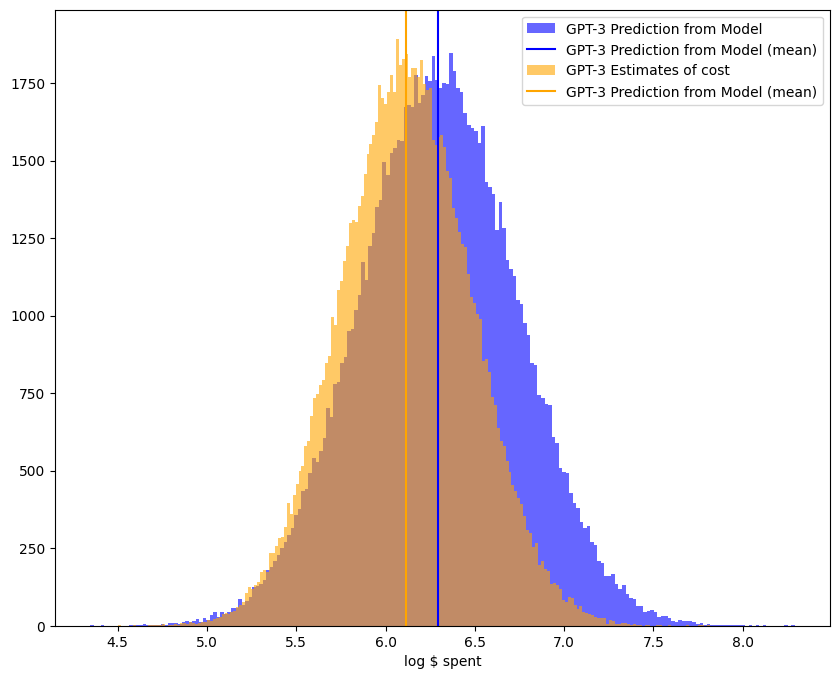

In [2]:
gpt3_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.2),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt3_spend = 1.3*M

plot_model_versus_estimate('GPT-3', samples, actual_gpt3_spend)

## GPT4 Prediction (for calibration)

## Model predicts GPT-4 spend will be ##
{1: '3.6 million',
 5: '5.6 million',
 10: '7.1 million',
 20: '9.4 million',
 30: '11.4 million',
 40: '13.5 million',
 50: '15.8 million',
 60: '18.6 million',
 70: '22.0 million',
 80: '26.8 million',
 90: '35.4 million',
 95: '44.4 million',
 99: '67.5 million'}
-
## Actual GPT-4 estimated to be ##
{1: '3.3 million',
 5: '5.8 million',
 10: '7.9 million',
 20: '11.5 million',
 30: '15.0 million',
 40: '18.8 million',
 50: '23.3 million',
 60: '28.8 million',
 70: '36.1 million',
 80: '47.2 million',
 90: '68.3 million',
 95: '93.1 million',
 99: '162.9 million'}
-
Actual spend on GPT-4 ($23.3M) is at the 73.2th percentile of the model
-


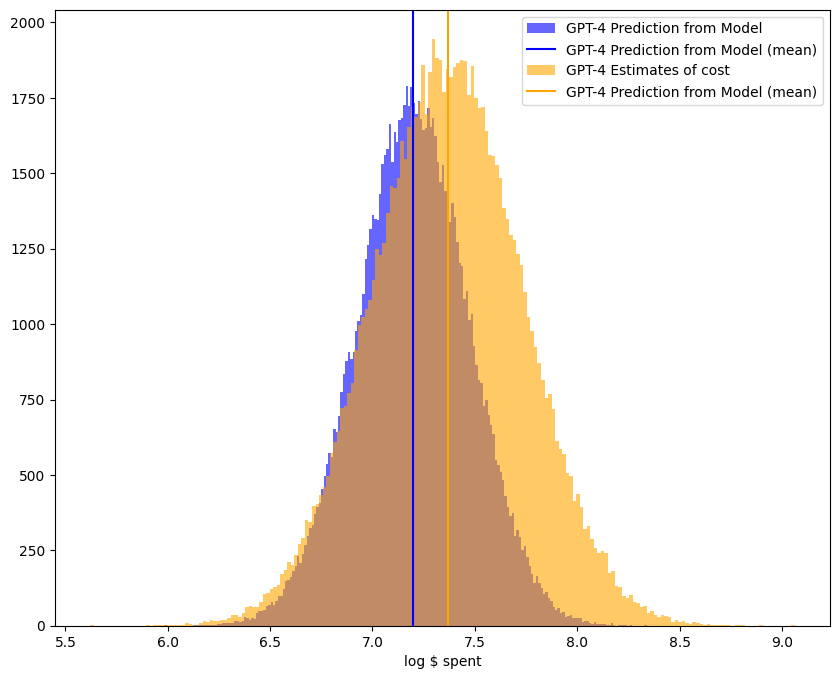

In [3]:
gpt4_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.2, 0.5),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
samples = gpt4_prediction @ (100*K)

# https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt4_spend = 23.3*M

plot_model_versus_estimate('GPT-4', samples, actual_gpt4_spend)

## Gemini Ultra Prediction (for calibration)

## Model predicts Gemini Ultra spend will be ##
{1: '2.5 million',
 5: '7.2 million',
 10: '13.1 million',
 20: '27.1 million',
 30: '45.8 million',
 40: '72.0 million',
 50: '109.4 million',
 60: '167.6 million',
 70: '261.6 million',
 80: '438.6 million',
 90: '892.8 million',
 95: '1.6 billion',
 99: '4.5 billion'}
-
## Actual Gemini Ultra estimated to be ##
{1: '4.5 million',
 5: '8.1 million',
 10: '11.0 million',
 20: '15.8 million',
 30: '20.7 million',
 40: '25.9 million',
 50: '32.0 million',
 60: '39.6 million',
 70: '49.8 million',
 80: '64.9 million',
 90: '93.8 million',
 95: '127.3 million',
 99: '230.0 million'}
-
Actual spend on Gemini Ultra ($32.1M) is at the 23.0th percentile of the model
-


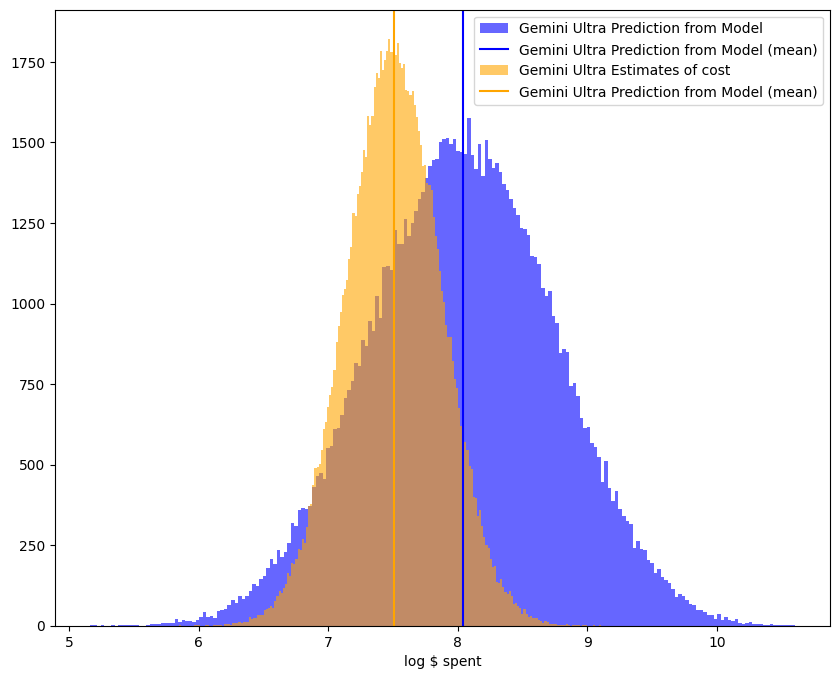

In [4]:
gemini_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 50*B, credibility=80),
                                                             percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                             percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                             percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
samples = gemini_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gemini_spend = 32.1*M

plot_model_versus_estimate('Gemini Ultra', samples, actual_gemini_spend)

## Mistral Large Prediction (for calibration)

## Model predicts Mistral large spend will be ##
{1: '3.1 million',
 5: '5.1 million',
 10: '6.7 million',
 20: '9.3 million',
 30: '11.7 million',
 40: '14.3 million',
 50: '17.3 million',
 60: '20.8 million',
 70: '25.4 million',
 80: '32.0 million',
 90: '44.4 million',
 95: '57.9 million',
 99: '94.4 million'}
-
## Actual Mistral large estimated to be ##
{1: '2.8 million',
 5: '5.0 million',
 10: '6.8 million',
 20: '9.9 million',
 30: '12.9 million',
 40: '16.2 million',
 50: '20.0 million',
 60: '24.8 million',
 70: '31.2 million',
 80: '41.0 million',
 90: '59.2 million',
 95: '79.8 million',
 99: '142.6 million'}
-
Actual spend on Mistral large ($20.0M) is at the 57.8th percentile of the model
-


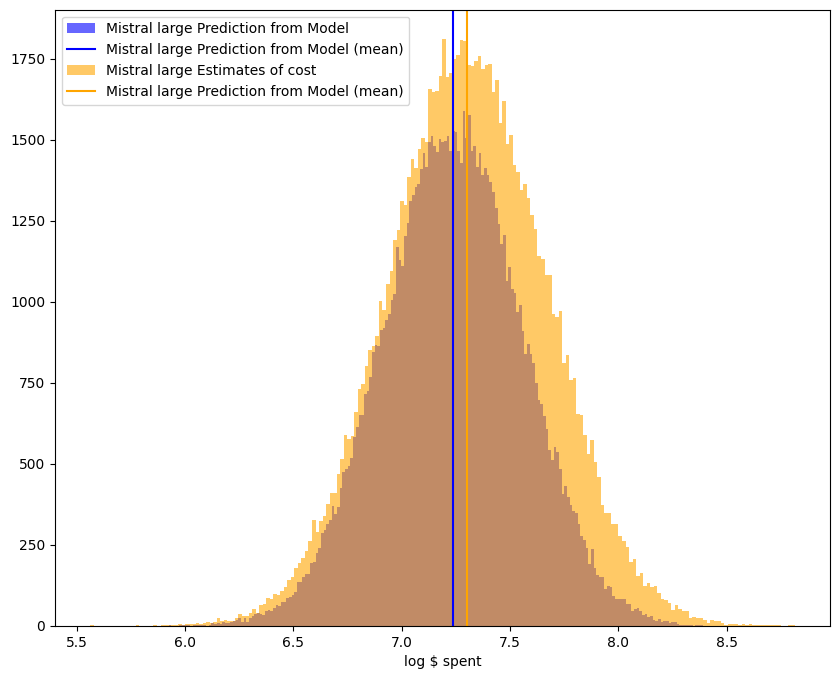

In [5]:
mistral_prediction = lab_spend_on_largest_model_this_year(total_investment=600*M,
                                                          total_revenue=0,
                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                          percent_revenue_that_is_profit=0,
                                                          percent_profit_spent_this_year=0,
                                                          percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                          percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
samples = mistral_prediction @ (100*K)

# 2e25 FLOP per https://epochai.org/blog/tracking-compute-intensive-ai-models
# Guess ~1e18 FLOP per $
# = 2e7 cost
actual_mistral_spend = 20*M

plot_model_versus_estimate('Mistral large', samples, actual_mistral_spend)

## Model for Largest Training Run by EOY2025

## SPEND ESTIMATE ##

$244.9 million (80%CI: $67.0 million to $904.4 million)

{1: '23.8 million',
 5: '47.1 million',
 10: '67.0 million',
 20: '104.3 million',
 30: '143.4 million',
 40: '188.7 million',
 50: '243.6 million',
 60: '314.8 million',
 70: '414.0 million',
 80: '572.8 million',
 90: '904.4 million',
 95: '1.3 billion',
 99: '2.6 billion'}



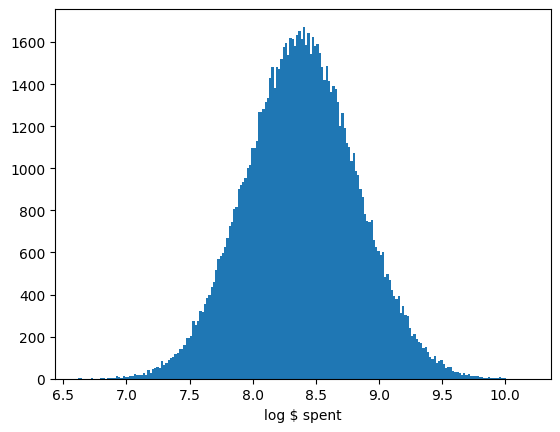



## FLOP ESTIMATE ##

27.19 log FLOP (80%CI: 26.46 to 27.92 log FLOP)

{1: 25.87,
 5: 26.26,
 10: 26.46,
 20: 26.71,
 30: 26.89,
 40: 27.04,
 50: 27.19,
 60: 27.33,
 70: 27.49,
 80: 27.67,
 90: 27.92,
 95: 28.13,
 99: 28.52}



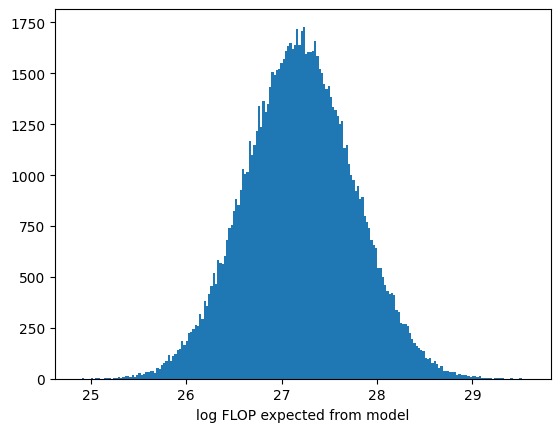

In [6]:
largest_openai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(13*B, 70*B), # $~10B reported in 2024
                                                                       total_revenue=sq.lognorm(4*B, 12*B),  # $4B reported as of 2024 Dec 26
                                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                       percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                       percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))

show_model_forecast(largest_openai_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$196.6 million (80%CI: $64.4 million to $605.0 million)

{1: '26.0 million',
 5: '46.6 million',
 10: '64.4 million',
 20: '94.1 million',
 30: '124.1 million',
 40: '157.1 million',
 50: '196.6 million',
 60: '245.5 million',
 70: '309.8 million',
 80: '410.5 million',
 90: '605.0 million',
 95: '834.8 million',
 99: '1.5 billion'}



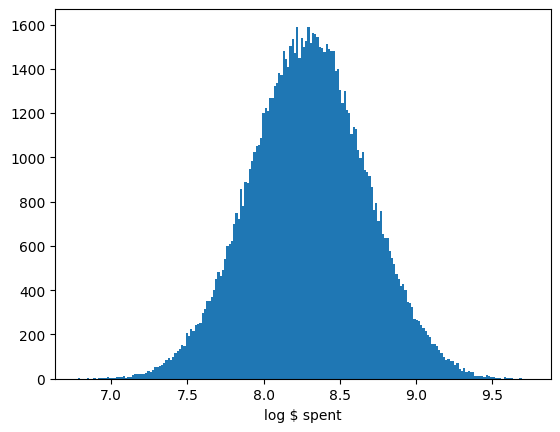



## FLOP ESTIMATE ##

27.09 log FLOP (80%CI: 26.42 to 27.77 log FLOP)

{1: 25.87,
 5: 26.22,
 10: 26.42,
 20: 26.65,
 30: 26.82,
 40: 26.96,
 50: 27.09,
 60: 27.23,
 70: 27.37,
 80: 27.54,
 90: 27.77,
 95: 27.96,
 99: 28.33}



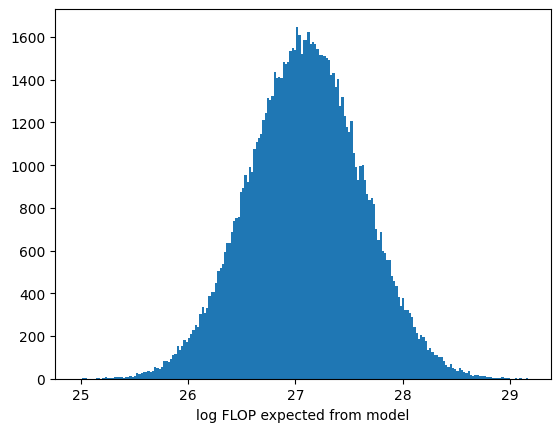

In [7]:
largest_anthropic_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(6*B, 20*B),
                                                                          total_revenue=sq.lognorm(1*B, 8*B),
                                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                          percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                          percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                          percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                          percent_compute_on_biggest_model=pct_dist(mean=0.2, sd=0.05))
show_model_forecast(largest_anthropic_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$203.3 million (80%CI: $23.5 million to $1.7 billion)

{1: '4.2 million',
 5: '12.6 million',
 10: '23.5 million',
 20: '49.7 million',
 30: '84.8 million',
 40: '134.5 million',
 50: '205.6 million',
 60: '315.0 million',
 70: '495.4 million',
 80: '833.9 million',
 90: '1.7 billion',
 95: '3.1 billion',
 99: '9.4 billion'}



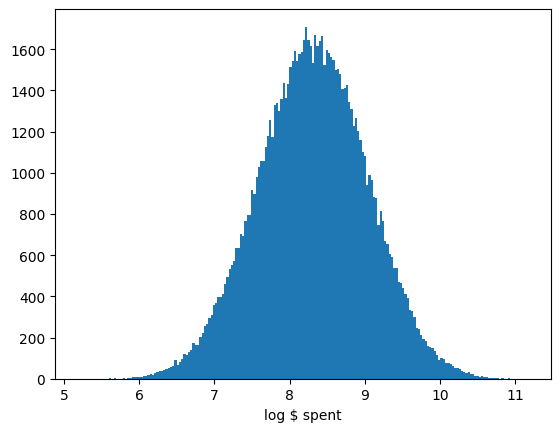



## FLOP ESTIMATE ##

27.11 log FLOP (80%CI: 26.07 to 28.15 log FLOP)

{1: 25.22,
 5: 25.77,
 10: 26.07,
 20: 26.43,
 30: 26.68,
 40: 26.9,
 50: 27.11,
 60: 27.32,
 70: 27.54,
 80: 27.79,
 90: 28.15,
 95: 28.43,
 99: 28.96}



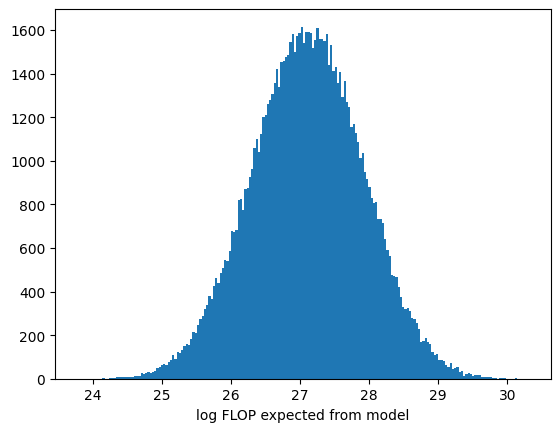

In [8]:
largest_google_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(50*B, 120*B, credibility=80),
                                                                           percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                                           percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
show_model_forecast(largest_google_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$53.6 million (80%CI: $5.7 million to $561.5 million)

{1: '2.1 million',
 5: '3.8 million',
 10: '5.7 million',
 20: '10.6 million',
 30: '18.5 million',
 40: '30.6 million',
 50: '49.3 million',
 60: '79.8 million',
 70: '133.6 million',
 80: '242.5 million',
 90: '561.5 million',
 95: '1.1 billion',
 99: '3.8 billion'}



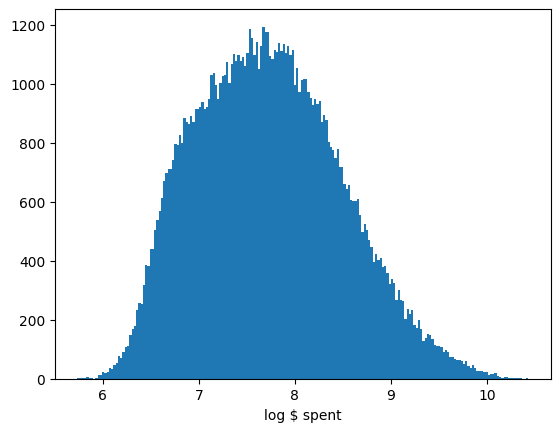



## FLOP ESTIMATE ##

26.53 log FLOP (80%CI: 25.46 to 27.65 log FLOP)

{1: 24.81,
 5: 25.22,
 10: 25.46,
 20: 25.79,
 30: 26.04,
 40: 26.27,
 50: 26.49,
 60: 26.72,
 70: 26.97,
 80: 27.25,
 90: 27.65,
 95: 27.97,
 99: 28.56}



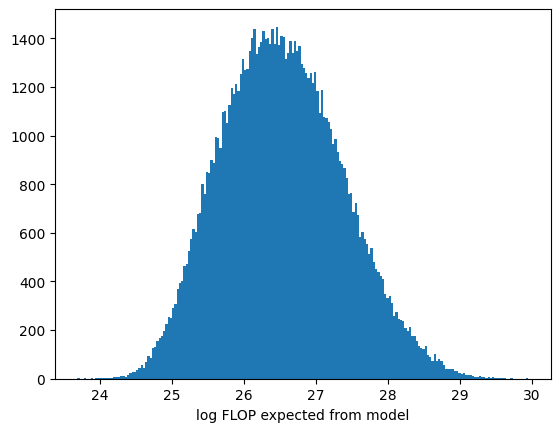

In [9]:
largest_microsoft_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(70*B, 110*B, credibility=80),
                                                                              percent_r_and_d_on_ai=pct_dist(0.05, 0.2),
                                                                              percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                              percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
show_model_forecast(largest_microsoft_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$94.1 million (80%CI: $6.8 million to $1.3 billion)

{1: '836.8 thousand',
 5: '3.3 million',
 10: '6.8 million',
 20: '16.7 million',
 30: '32.6 million',
 40: '56.9 million',
 50: '95.3 million',
 60: '159.9 million',
 70: '279.6 million',
 80: '531.2 million',
 90: '1.3 billion',
 95: '2.6 billion',
 99: '9.3 billion'}



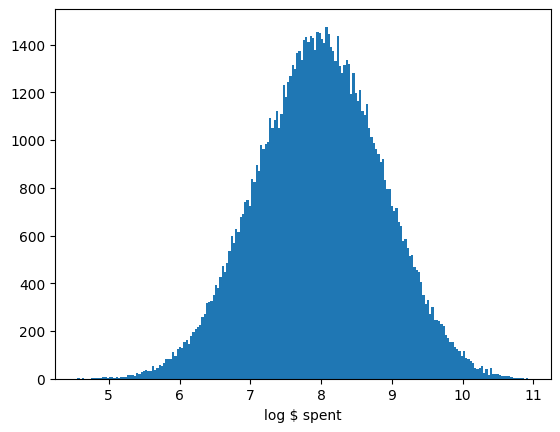



## FLOP ESTIMATE ##

26.77 log FLOP (80%CI: 25.54 to 27.99 log FLOP)

{1: 24.56,
 5: 25.21,
 10: 25.54,
 20: 25.97,
 30: 26.27,
 40: 26.54,
 50: 26.78,
 60: 27.02,
 70: 27.28,
 80: 27.58,
 90: 27.99,
 95: 28.33,
 99: 28.95}



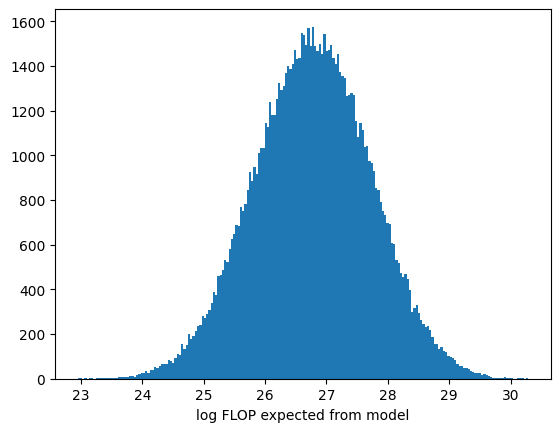

In [10]:
largest_fb_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(60*B, 120*B, credibility=80),
                                                                       percent_r_and_d_on_ai=pct_dist(0.01, 0.4),
                                                                       percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(0.005, 0.2))
show_model_forecast(largest_fb_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$57.7 million (80%CI: $5.8 million to $571.5 million)

{1: '887.2 thousand',
 5: '3.1 million',
 10: '5.8 million',
 20: '12.8 million',
 30: '22.8 million',
 40: '37.0 million',
 50: '57.9 million',
 60: '91.2 million',
 70: '148.2 million',
 80: '263.3 million',
 90: '571.5 million',
 95: '1.1 billion',
 99: '3.4 billion'}



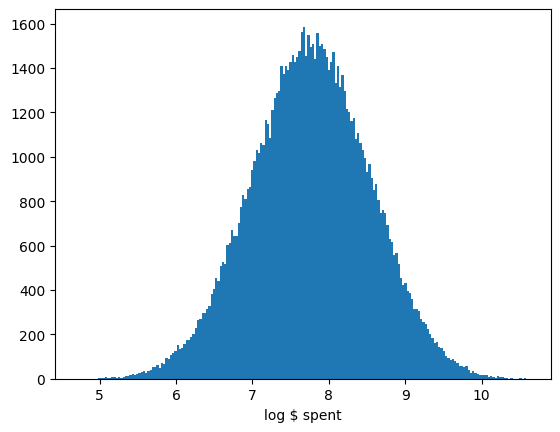



## FLOP ESTIMATE ##

26.56 log FLOP (80%CI: 25.46 to 27.66 log FLOP)

{1: 24.56,
 5: 25.14,
 10: 25.46,
 20: 25.84,
 30: 26.11,
 40: 26.34,
 50: 26.56,
 60: 26.78,
 70: 27.01,
 80: 27.28,
 90: 27.66,
 95: 27.97,
 99: 28.54}



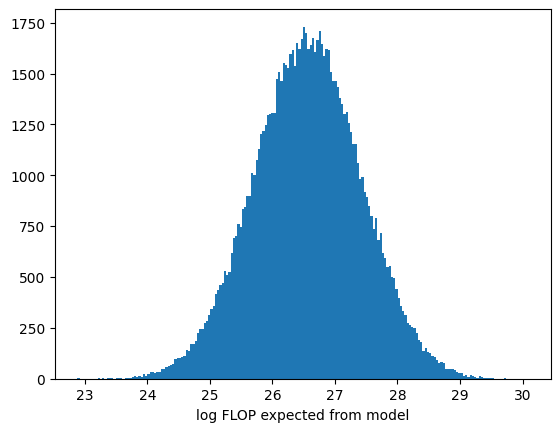

In [11]:
largest_amazon_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(60*B, 120*B, credibility=80),
                                                                           percent_r_and_d_on_ai=pct_dist(0.01, 0.3),
                                                                           percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(0.005, 0.1))
show_model_forecast(largest_amazon_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$69.8 million (80%CI: $21.3 million to $227.3 million)

{1: '8.1 million',
 5: '15.3 million',
 10: '21.3 million',
 20: '32.1 million',
 30: '43.2 million',
 40: '55.4 million',
 50: '70.1 million',
 60: '88.5 million',
 70: '113.5 million',
 80: '152.1 million',
 90: '227.3 million',
 95: '317.5 million',
 99: '588.4 million'}



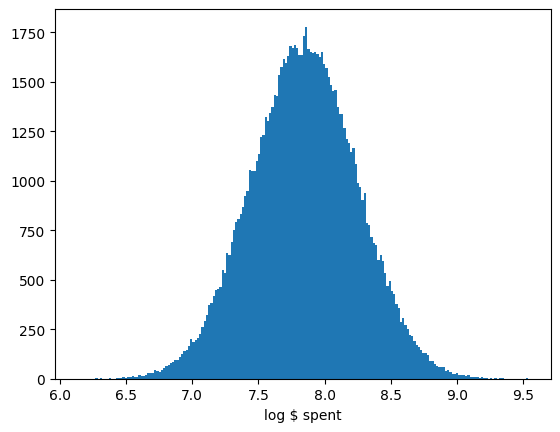



## FLOP ESTIMATE ##

26.64 log FLOP (80%CI: 25.95 to 27.34 log FLOP)

{1: 25.38,
 5: 25.75,
 10: 25.95,
 20: 26.19,
 30: 26.36,
 40: 26.51,
 50: 26.64,
 60: 26.78,
 70: 26.93,
 80: 27.1,
 90: 27.34,
 95: 27.53,
 99: 27.9}



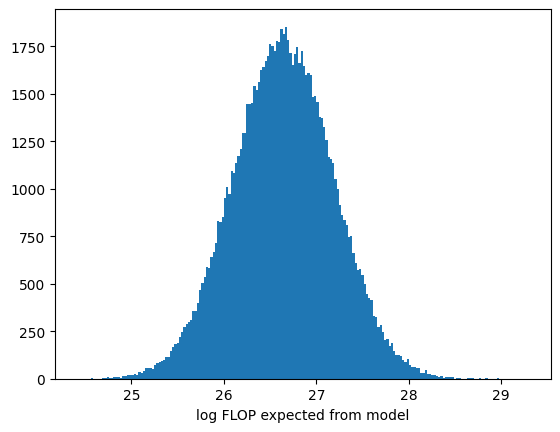

In [12]:
largest_mistral_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1.2*B, 5*B, credibility=80),
                                                                        total_revenue=0,
                                                                        percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                        percent_revenue_that_is_profit=0,
                                                                        percent_profit_spent_this_year=0,
                                                                        percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                        percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
show_model_forecast(largest_mistral_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$701.7 million (80%CI: $242.6 million to $2.0 billion)

{1: '102.4 million',
 5: '179.9 million',
 10: '242.6 million',
 20: '349.5 million',
 30: '455.2 million',
 40: '568.7 million',
 50: '702.4 million',
 60: '864.0 million',
 70: '1.1 billion',
 80: '1.4 billion',
 90: '2.0 billion',
 95: '2.7 billion',
 99: '4.8 billion'}



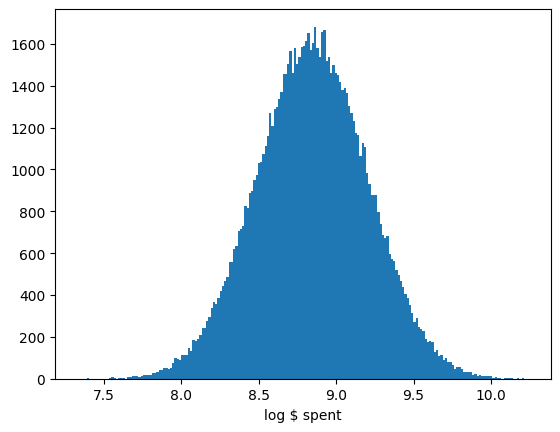



## FLOP ESTIMATE ##

27.65 log FLOP (80%CI: 26.99 to 28.3 log FLOP)

{1: 26.44,
 5: 26.81,
 10: 26.99,
 20: 27.22,
 30: 27.38,
 40: 27.52,
 50: 27.65,
 60: 27.77,
 70: 27.92,
 80: 28.08,
 90: 28.3,
 95: 28.49,
 99: 28.84}



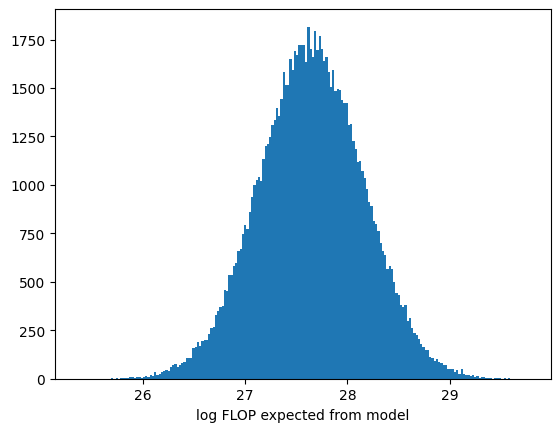

In [13]:
largest_xai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(15*B, 40*B, credibility=80), # 12B in 2024
                                                                    total_revenue=0,
                                                                    percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                    percent_revenue_that_is_profit=0,
                                                                    percent_profit_spent_this_year=0,
                                                                    percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                    percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
show_model_forecast(largest_xai_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$192.7 million (80%CI: $115.8 million to $321.4 million)

{1: '76.3 million',
 5: '100.3 million',
 10: '115.8 million',
 20: '137.7 million',
 30: '156.0 million',
 40: '174.0 million',
 50: '193.0 million',
 60: '213.2 million',
 70: '237.6 million',
 80: '269.7 million',
 90: '321.4 million',
 95: '370.3 million',
 99: '482.2 million'}



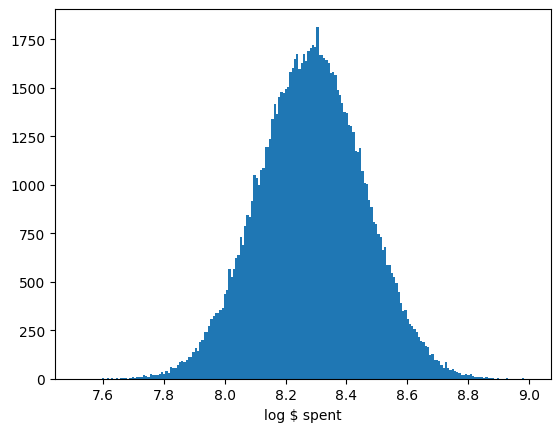



## FLOP ESTIMATE ##

27.08 log FLOP (80%CI: 26.57 to 27.6 log FLOP)

{1: 26.15,
 5: 26.42,
 10: 26.57,
 20: 26.75,
 30: 26.87,
 40: 26.98,
 50: 27.08,
 60: 27.18,
 70: 27.29,
 80: 27.43,
 90: 27.6,
 95: 27.75,
 99: 28.03}



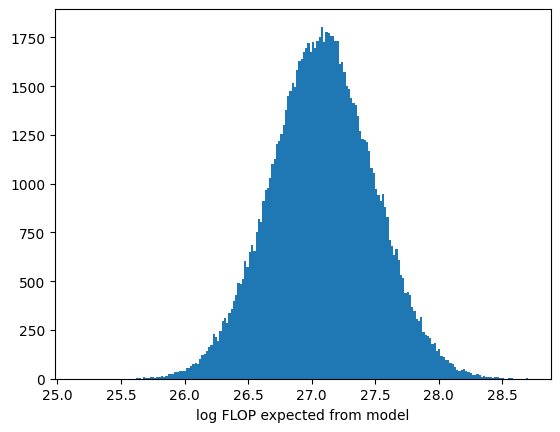

In [14]:
largest_ssi_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1*B, 2*B, credibility=80),
                                                                    total_revenue=0,
                                                                    percent_investment_spent_this_year=pct_dist(0.3, 0.5),
                                                                    percent_revenue_that_is_profit=0,
                                                                    percent_profit_spent_this_year=0,
                                                                    percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                    percent_compute_on_biggest_model=pct_dist(mean=0.6, sd=0.05))
show_model_forecast(largest_ssi_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$27.6 million (80%CI: $1.6 million to $485.5 million)

{1: '147.9 thousand',
 5: '693.0 thousand',
 10: '1.6 million',
 20: '4.2 million',
 30: '8.6 million',
 40: '15.8 million',
 50: '27.8 million',
 60: '48.8 million',
 70: '89.6 million',
 80: '181.9 million',
 90: '485.5 million',
 95: '1.1 billion',
 99: '4.9 billion'}



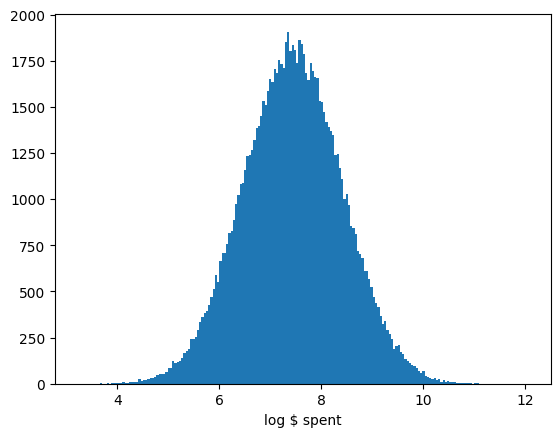



## FLOP ESTIMATE ##

26.24 log FLOP (80%CI: 24.91 to 27.57 log FLOP)

{1: 23.84,
 5: 24.53,
 10: 24.91,
 20: 25.37,
 30: 25.7,
 40: 25.98,
 50: 26.25,
 60: 26.51,
 70: 26.79,
 80: 27.11,
 90: 27.57,
 95: 27.95,
 99: 28.65}



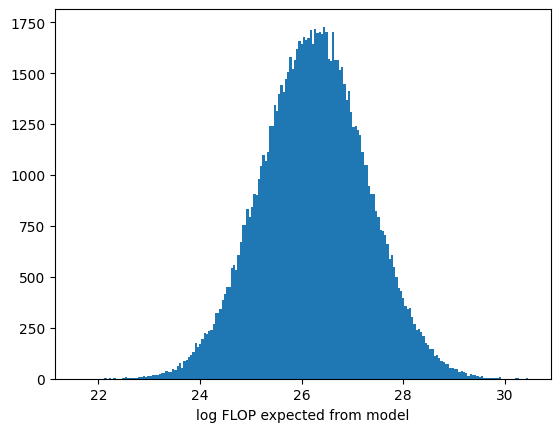

In [15]:
largest_us_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 20*B, credibility=80),
                                                                     percent_r_and_d_on_ai=1,
                                                                     percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                     percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
show_model_forecast(largest_us_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$479.0 thousand (80%CI: $96.4 thousand to $2.4 million)

{1: '28.8 thousand',
 5: '62.5 thousand',
 10: '96.4 thousand',
 20: '165.0 thousand',
 30: '242.8 thousand',
 40: '340.6 thousand',
 50: '468.9 thousand',
 60: '647.1 thousand',
 70: '916.7 thousand',
 80: '1.4 million',
 90: '2.4 million',
 95: '3.9 million',
 99: '9.6 million'}



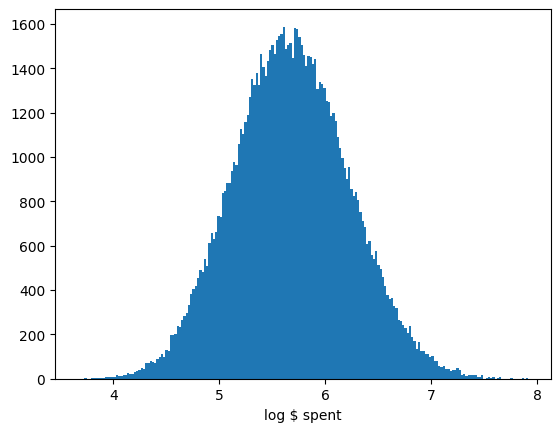



## FLOP ESTIMATE ##

24.48 log FLOP (80%CI: 23.64 to 25.32 log FLOP)

{1: 22.99,
 5: 23.42,
 10: 23.64,
 20: 23.93,
 30: 24.13,
 40: 24.31,
 50: 24.47,
 60: 24.64,
 70: 24.82,
 80: 25.03,
 90: 25.32,
 95: 25.57,
 99: 26.04}



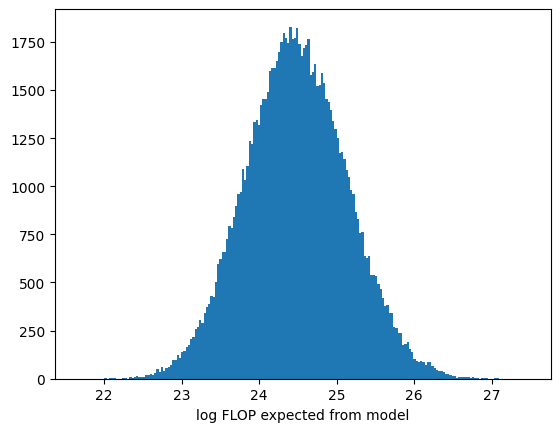

In [16]:
largest_uk_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 1*B, credibility=80),
                                                                     percent_r_and_d_on_ai=1,
                                                                     percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                     percent_compute_on_biggest_model=pct_dist(0.001, 0.01))
show_model_forecast(largest_uk_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$4.3 million (80%CI: $143.7 thousand to $123.5 million)

{1: '9.5 thousand',
 5: '55.2 thousand',
 10: '143.7 thousand',
 20: '461.7 thousand',
 30: '1.1 million',
 40: '2.2 million',
 50: '4.3 million',
 60: '8.4 million',
 70: '17.1 million',
 80: '38.9 million',
 90: '123.5 million',
 95: '325.3 million',
 99: '2.0 billion'}



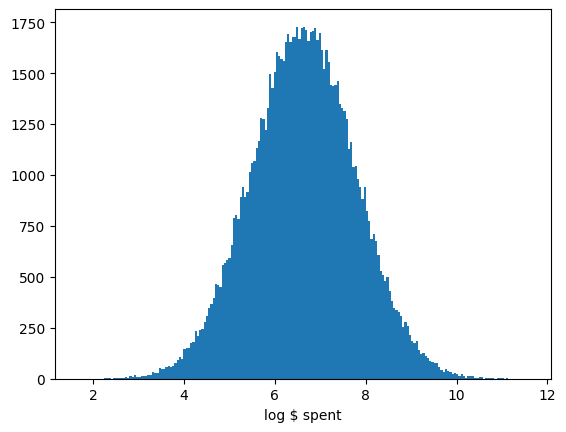



## FLOP ESTIMATE ##

25.43 log FLOP (80%CI: 23.89 to 26.97 log FLOP)

{1: 22.62,
 5: 23.45,
 10: 23.89,
 20: 24.42,
 30: 24.8,
 40: 25.12,
 50: 25.43,
 60: 25.74,
 70: 26.07,
 80: 26.45,
 90: 26.97,
 95: 27.41,
 99: 28.24}



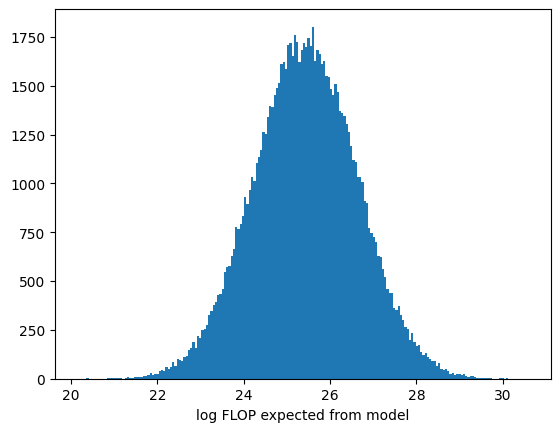

In [17]:
largest_china_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 50*B, credibility=80),
                                                                        percent_r_and_d_on_ai=1,
                                                                        percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                        percent_compute_on_biggest_model=pct_dist(0.01, 0.1))

# Adjust China's "effective US-equivalent" spend by export controls and other things
largest_china_gov_prediction = sq.dist_max(0, largest_china_gov_prediction - sq.norm(0.5, 1.5, lclip=0.05, rclip=1))

show_model_forecast(largest_china_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$21.7 million (80%CI: $3.0 million to $295.6 million)

{1: '1.3 million',
 5: '2.2 million',
 10: '3.0 million',
 20: '4.7 million',
 30: '6.7 million',
 40: '9.6 million',
 50: '14.2 million',
 60: '23.1 million',
 70: '43.7 million',
 80: '97.3 million',
 90: '295.6 million',
 95: '752.4 million',
 99: '4.0 billion'}



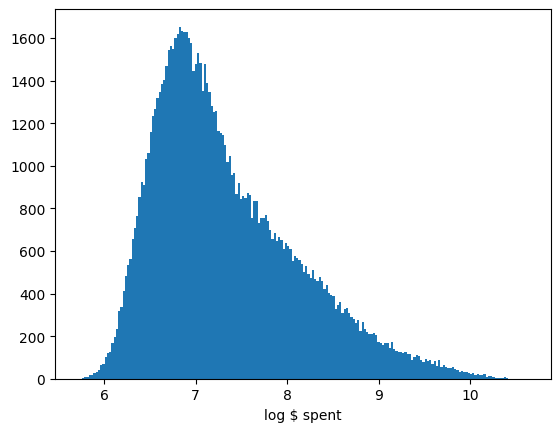



## FLOP ESTIMATE ##

26.14 log FLOP (80%CI: 25.14 to 27.35 log FLOP)

{1: 24.57,
 5: 24.93,
 10: 25.14,
 20: 25.4,
 30: 25.61,
 40: 25.81,
 50: 26.0,
 60: 26.23,
 70: 26.5,
 80: 26.84,
 90: 27.35,
 95: 27.78,
 99: 28.54}



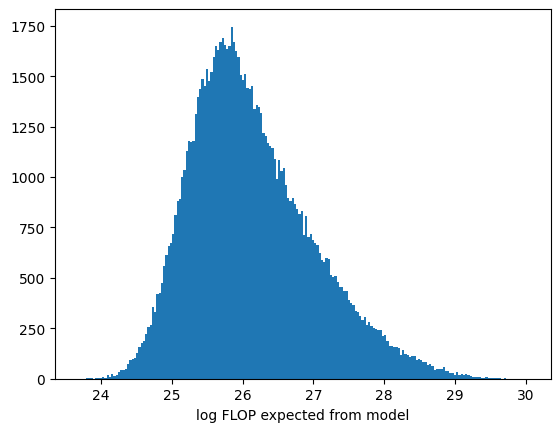

In [18]:
largest_arab_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(30*B, 50*B, credibility=80),
                                                                       percent_r_and_d_on_ai=1,
                                                                       percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                       percent_compute_on_biggest_model=pct_dist(0.0001, 0.05))

# Adjust China's "effective US-equivalent" spend by export controls and other things
largest_arab_gov_prediction = sq.dist_max(0, largest_arab_gov_prediction - sq.norm(0.05, 1, lclip=0.05, rclip=1))

show_model_forecast(largest_arab_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$1.5 billion (80%CI: $547.7 million to $4.6 billion)

{1: '293.9 million',
 5: '436.4 million',
 10: '547.7 million',
 20: '736.0 million',
 30: '923.0 million',
 40: '1.1 billion',
 50: '1.4 billion',
 60: '1.7 billion',
 70: '2.2 billion',
 80: '2.9 billion',
 90: '4.6 billion',
 95: '7.1 billion',
 99: '17.2 billion'}



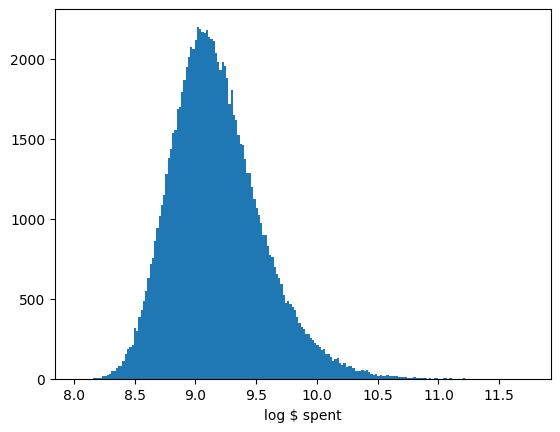



## FLOP ESTIMATE ##

27.98 log FLOP (80%CI: 27.33 to 28.65 log FLOP)

{1: 26.84,
 5: 27.15,
 10: 27.33,
 20: 27.54,
 30: 27.7,
 40: 27.83,
 50: 27.96,
 60: 28.09,
 70: 28.23,
 80: 28.4,
 90: 28.65,
 95: 28.87,
 99: 29.3}



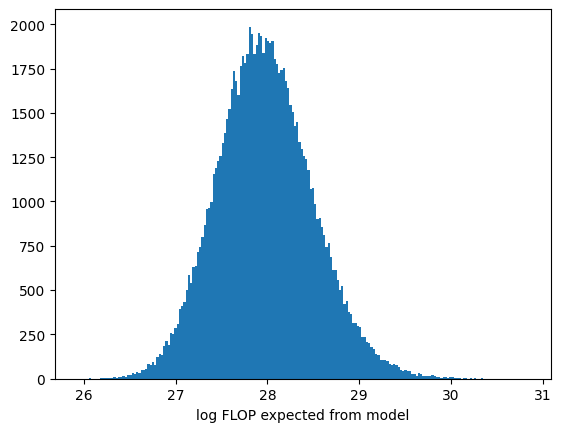

In [19]:
mixed_model = (largest_openai_model_prediction >>
               sq.dist_max(largest_anthropic_model_prediction) >>
               sq.dist_max(largest_mistral_model_prediction) >>
               sq.dist_max(largest_xai_model_prediction) >>
               sq.dist_max(largest_google_model_prediction) >>
               sq.dist_max(largest_microsoft_model_prediction) >>
               sq.dist_max(largest_fb_model_prediction) >>
               sq.dist_max(largest_amazon_model_prediction) >>
               sq.dist_max(largest_us_gov_prediction) >>
               sq.dist_max(largest_uk_gov_prediction) >>
               sq.dist_max(largest_arab_gov_prediction) >>
               sq.dist_max(largest_ssi_model_prediction) >>
               sq.dist_max(largest_china_gov_prediction))

show_model_forecast(mixed_model @ (100*K))

In [20]:
models = [['OpenAI', largest_openai_model_prediction],
          ['Anthropic', largest_anthropic_model_prediction],
          ['Mistral', largest_mistral_model_prediction],
          ['xAI', largest_xai_model_prediction],
          ['Google', largest_google_model_prediction],
          ['Microsoft', largest_microsoft_model_prediction],
          ['Meta', largest_fb_model_prediction],
          ['Amazon', largest_amazon_model_prediction],
          ['SSI', largest_ssi_model_prediction],
          ['US', largest_us_gov_prediction],
          ['UK', largest_uk_gov_prediction],
          ['Arab', largest_arab_gov_prediction],
          ['China', largest_china_gov_prediction]]

print('## % of having largest model at EOY2025 ##')
labels = [m[0] for m in models]
model_sizes_log = np.array([m[1] @ 100_000 for m in models])
max_indices = np.argmax(model_sizes_log, axis=0)
max_labels = [labels[i] for i in max_indices]
label_counts = Counter(max_labels)
label_percentages = {label: f"{round((count / 100_000) * 100, 1)}%" for label, count in Counter(max_labels).items()}
pprint(label_percentages)
print('')
print('')

print('## % of being at frontier (within 1 OOM of largest model) at EOY2025 ##')
max_log_sizes = np.max(model_sizes_log, axis=0)
within_one_OOM = (model_sizes_log >= (max_log_sizes - 1))
within_one_OOM_counts = np.sum(within_one_OOM, axis=1)
total_samples = model_sizes_log.shape[1]  # Total number of samples
label_percentages_within_one_OOM = {label: f"{round((count / total_samples) * 100, 1)}%" for label, count in zip(labels, within_one_OOM_counts)}
pprint(label_percentages_within_one_OOM)

## % of having largest model at EOY2025 ##
{'Amazon': '5.0%',
 'Anthropic': '4.5%',
 'Arab': '3.5%',
 'China': '1.7%',
 'Google': '16.1%',
 'Meta': '11.4%',
 'Microsoft': '5.0%',
 'Mistral': '0.4%',
 'OpenAI': '9.0%',
 'SSI': '0.6%',
 'US': '4.9%',
 'xAI': '37.9%'}


## % of being at frontier (within 1 OOM of largest model) at EOY2025 ##
{'Amazon': '32.7%',
 'Anthropic': '60.7%',
 'Arab': '17.5%',
 'China': '9.9%',
 'Google': '60.0%',
 'Meta': '43.7%',
 'Microsoft': '30.2%',
 'Mistral': '27.5%',
 'OpenAI': '66.6%',
 'SSI': '63.2%',
 'UK': '0.0%',
 'US': '24.5%',
 'xAI': '91.6%'}


## Cache spend model

Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 8.5,
 5: 8.6,
 10: 8.7,
 20: 8.9,
 30: 9.0,
 40: 9.1,
 50: 9.1,
 60: 9.2,
 70: 9.3,
 80: 9.5,
 90: 9.7,
 95: 9.8,
 99: 10.2}


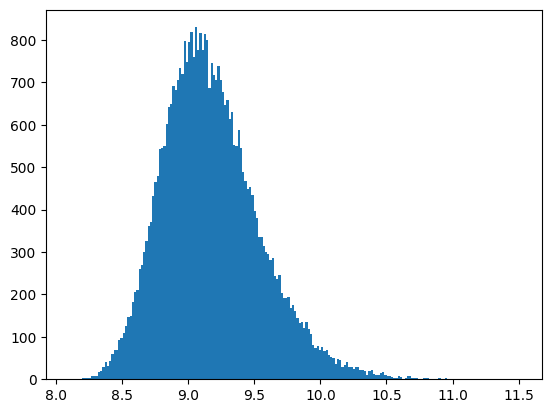

In [21]:
# Output expected willingness to pay for a model in 2025, using log 2022$USD
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()

## Appendix

## SPEND ESTIMATE ##

$5.0 billion (80%CI: $2.6 billion to $9.7 billion)

{1: '1.5 billion',
 5: '2.1 billion',
 10: '2.6 billion',
 20: '3.2 billion',
 30: '3.8 billion',
 40: '4.4 billion',
 50: '5.0 billion',
 60: '5.7 billion',
 70: '6.5 billion',
 80: '7.7 billion',
 90: '9.7 billion',
 95: '11.7 billion',
 99: '16.6 billion'}



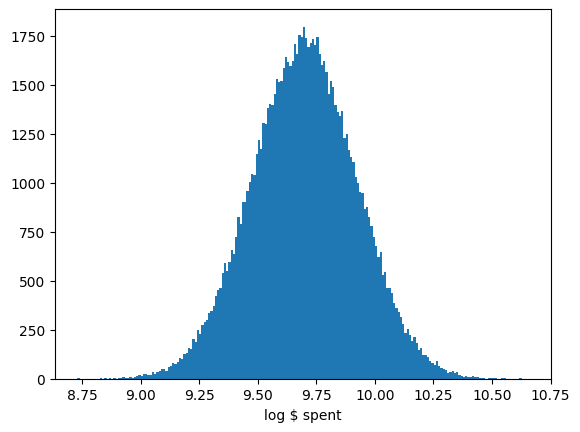



## FLOP ESTIMATE ##

28.5 log FLOP (80%CI: 27.95 to 29.04 log FLOP)

{1: 27.51,
 5: 27.8,
 10: 27.95,
 20: 28.14,
 30: 28.27,
 40: 28.39,
 50: 28.5,
 60: 28.61,
 70: 28.72,
 80: 28.86,
 90: 29.04,
 95: 29.2,
 99: 29.49}



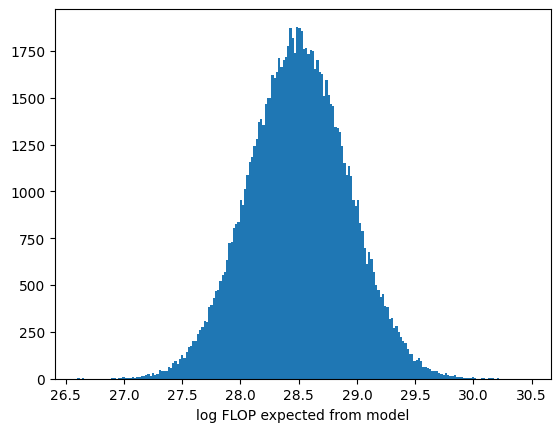

In [22]:
stargate = lab_spend_on_largest_model_this_year(total_investment=100*B,
                                                total_revenue=0,
                                                percent_investment_spent_this_year=1,
                                                percent_revenue_that_is_profit=0,
                                                percent_profit_spent_this_year=0,
                                                percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
show_model_forecast(stargate @ (100*K))

In [23]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2025-01-08 14:10:01.421790
